# Quickstart
This notebook provides a ready-to-use setup. So data download and ingestion steps are skipped in this notebook.

<div style="display: flex; gap: 10px;">
  <span style="font-weight: bold;">Note:</span>
  <div style="display: flex; flex-direction: column; gap: 4px;">
    <div style="color: red; font-weight: bold;">This notebook is designed specifically to run on Google Colab</div>
    <div style="color: green; font-weight: bold;">After the first step, all of the steps are optional. So any step can be done skipping the steps before it</div>
  </div>
</div>

### Setup

For mounting the cloned repository in the notebook environment, first upload the main folder of the cloned repository to **Drive** under **My Drive**. Then run the following cell:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/News-Powered-Stock-Market-Analysis")

This will mount Google Drive to Colab, clone the repository to Drive and set the parent directory of any filepath to: *"/content/drive/MyDrive/News-Powered-Stock-Market-Analysis"*

Now we can access all the files of the drive **Files** Section in the left sidebar

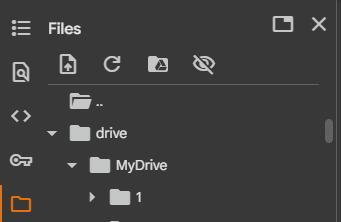

Also, we can direcly edit the python files by clicking on the file which opens a editor at the right side

Let's also install some extra dependencies needed:

In [ ]:
!pip install xgboost==2.1.1 --upgrade
!pip install git+https://github.com/amazon-science/chronos-forecasting.git
!pip install pyngrok

### Download and Ingest the Data

>>*Note: The data that we need to fetch from HuggingFace is too big! So this step can only be done locally. However, the data is already present in the repository in processsed form.*

### Sentiment Analysis

In [ ]:
!python scripts/sentiment_analysis.py --late-mode shift-late --batch-size 16 --max-length 256

### Train Model

In [ ]:
!python scripts/train.py --model xgb  --save-model --save-predictions

You can use ridge, lstm or chronos for the ```--model```

### Evaluate Saved Models

In [ ]:
!python scripts/eval_model.py --model xgb --save-predictions

You can use ridge, lstm or chronos for the ```--model```

### Run Demo App


We will be using pyngrok to expose your local Flask app to the web (otherwise it will run on the localhost of Google VM and you won't be able to access it)

Go to the [ngrok dashboard](https://dashboard.ngrok.com/get-started/your-authtoken) to get your auth token and replace YOUR_NGROK_AUTH with the token in the cell below

In [ ]:
!python demo_app/server.py --ngrok-token YOUR_NGROK_AUTH

The link to the web app will be displayed in the output

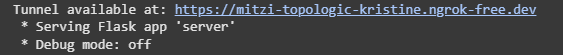